## Keras - Reconhecimento de Dígitos (MNIST)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
#from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
%matplotlib inline

## Carregando arquivo de dígitos

In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11501568/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's look at some examples of the training data

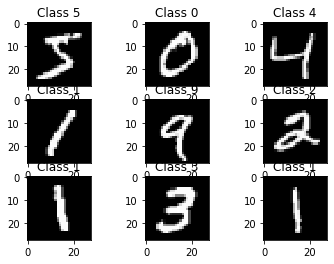

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Formatar e  Colocar os dados em Escala 
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [6]:
# codificação ONE-HOT ENCODING
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Construindo a Rede Neural
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
<img src="https://raw.githubusercontent.com/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/master/deeplearning/data/figure.png" />

In [8]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
#model.add(Dropout(0.3))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

## Compile the model


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [10]:
%%time
model.fit(X_train, Y_train,
          batch_size=256, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
235/235 [==============================] - 13s 5ms/step - loss: 1.9385 - accuracy: 0.4901 - val_loss: 0.9052 - val_accuracy: 0.8282
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.7928 - accuracy: 0.8365 - val_loss: 0.5252 - val_accuracy: 0.8748
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.5218 - accuracy: 0.8711 - val_loss: 0.4172 - val_accuracy: 0.8914
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4284 - accuracy: 0.8876 - val_loss: 0.3671 - val_accuracy: 0.9014
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3805 - accuracy: 0.8985 - val_loss: 0.3346 - val_accuracy: 0.9075
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3479 - accuracy: 0.9053 - val_loss: 0.3149 - val_accuracy: 0.9110
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3326 - accuracy: 0.9071 - val_loss: 0.2994 - val_accuracy: 0.9151
Epoch

## Finally, evaluate its performance

In [11]:
#loss = model.evaluate(X_test, Y_test,verbose=0)
#print('Acurácia de teste:', 1 - loss)

_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 94.080


# CNN Model

![image](https://lh4.googleusercontent.com/ojMXAE77tiVVF3RSqK1lldysJx5OzBJdE5ng_0w7GpHYWl9GR9jjBN0p56UFW3dM3gEdS-0oTOw0IjORJXVImFvcXdD-EnFibJl06gxMN_kYTeOyfmanNEvXK59CYzt2t_3DifPG)

In [12]:
# define cnn model
model = Sequential() # 32
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1) ) ) #
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu',  kernel_initializer='he_uniform')) #))
model.add(Dense(10, activation='softmax'))

# compile model
#opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1843300   
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [13]:
# reshape dataset to have a single channel
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

# one hot encode target values
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [14]:
%%time
history = model.fit(X_train, Y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(X_test, Y_test), 
                    verbose=1)

Epoch 1/20
118/118 [==============================] - 19s 26ms/step - loss: 0.4585 - accuracy: 0.8446 - val_loss: 0.0434 - val_accuracy: 0.9855
Epoch 2/20
118/118 [==============================] - 3s 24ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0403 - val_accuracy: 0.9855
Epoch 3/20
118/118 [==============================] - 3s 22ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0337 - val_accuracy: 0.9884
Epoch 4/20
118/118 [==============================] - 3s 22ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0323 - val_accuracy: 0.9897
Epoch 5/20
118/118 [==============================] - 3s 23ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0412 - val_accuracy: 0.9877
Epoch 6/20
118/118 [==============================] - 3s 22ms/step - loss: 0.0105 - accuracy: 0.9963 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 7/20
118/118 [==============================] - 3s 22ms/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.0347 - val_accuracy: 0.990

In [15]:
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 98.830


## Plotando algumas predições erradas do conjunto de teste

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


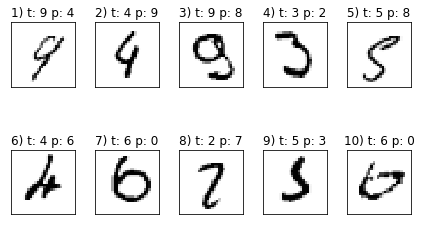

In [16]:
# classificações incorretas
y_test_pred = model.predict_classes(X_test)
#y_test_pred = np_utils.to_categorical(y_test_pred, nb_classes)

miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]


#miscl_img = X_test[correct_indices]
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# Plotando algumas predições Corretas do conjunto de teste

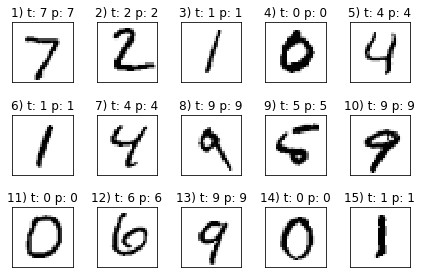

In [17]:
# classificações corretas
miscl_img = X_test[y_test == y_test_pred][:25]
correct_lab = y_test[y_test == y_test_pred][:25]
miscl_lab = y_test_pred[y_test == y_test_pred][:25]


#miscl_img = X_test[correct_indices]
fig, ax = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(15):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()